In [1]:
import numpy as np
import sep
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy.io import fits

float32


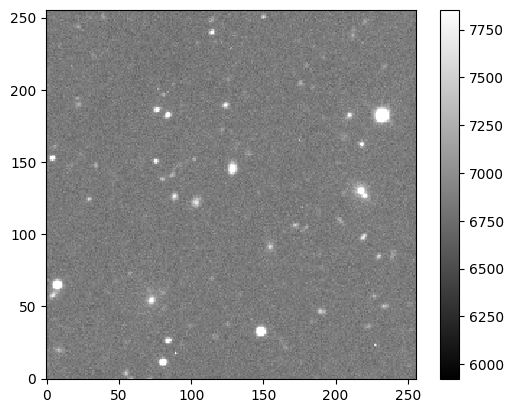

In [10]:
#with astropy read image
hdu = fits.open("image.fits")
data = hdu[0].data
print(data.dtype)

#set variables m and s for mean and standard deviation values of image data set
m, s = np.mean(data), np.std(data)

plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

plt.savefig('septutorial_1.png', bbox_inches='tight')

In [3]:
#background subtraction

#measure background of image
bkg = sep.Background(data)

print(bkg.globalback)

6852.04931640625


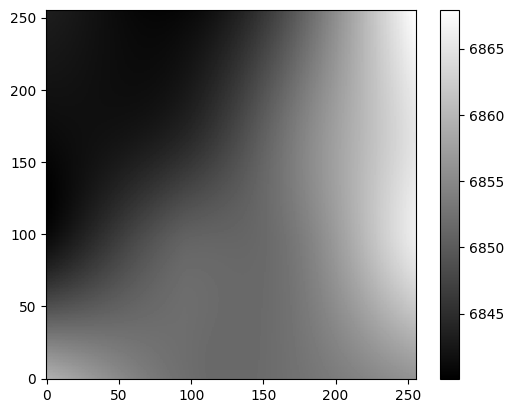

In [4]:
#we can see in the image that 6852 matches the mean background color

#background as array like above data set
bkg_image = bkg.back()

plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

plt.savefig('septutorial_2.png', bbox_inches='tight')

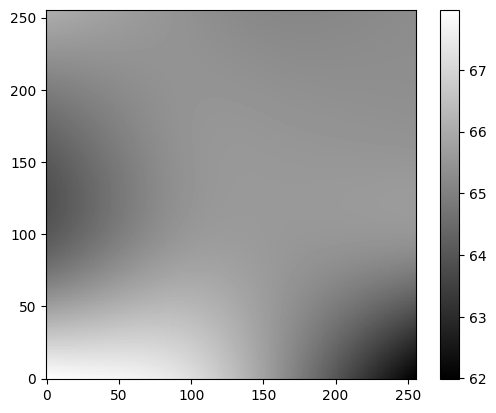

In [5]:
#background noise as array
bkg_rms = bkg.rms()

plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower') #same parameters as last time
plt.colorbar();

plt.savefig('septutorial_3.png', bbox_inches='tight')

In [6]:
#subtract background from data
data_sub = data - bkg

In [11]:
print(bkg.globalrms)

65.46174621582031


In [7]:
#object detection

#detection threshold is 1.5sigma, where sigma is background noise
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

# objects['x'] and objects['y'] will give coordinates of objects

#how many objects were detected
len(objects)

68

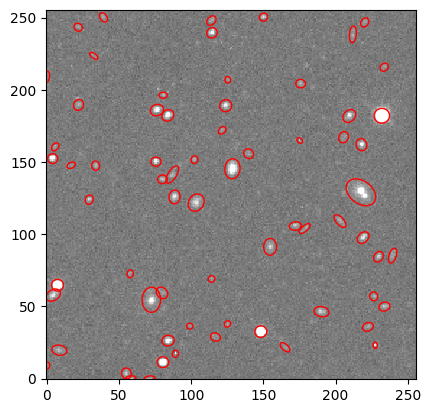

In [8]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')


#plot ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)   #a, b, and theta also provided in objects
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)


plt.savefig('septutorial_4.png', bbox_inches='tight')

In [9]:
#circular aperture photometry with 3 pixel radius at obj locations

flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
